In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score  # For splitting the dataset
from sklearn.preprocessing import StandardScaler      # For feature scaling
from sklearn.svm import SVC                           # For Support Vector Classification
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt                 # For plotting
import seaborn as sns                                 # For visualizing data or results

# Data Collection and Analysis 

In [137]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [139]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


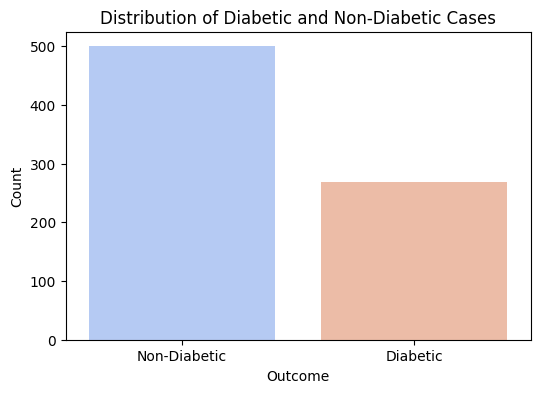

In [141]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=data, palette='coolwarm')
plt.title("Distribution of Diabetic and Non-Diabetic Cases")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

# Diabetic or Non diabetic - countplot

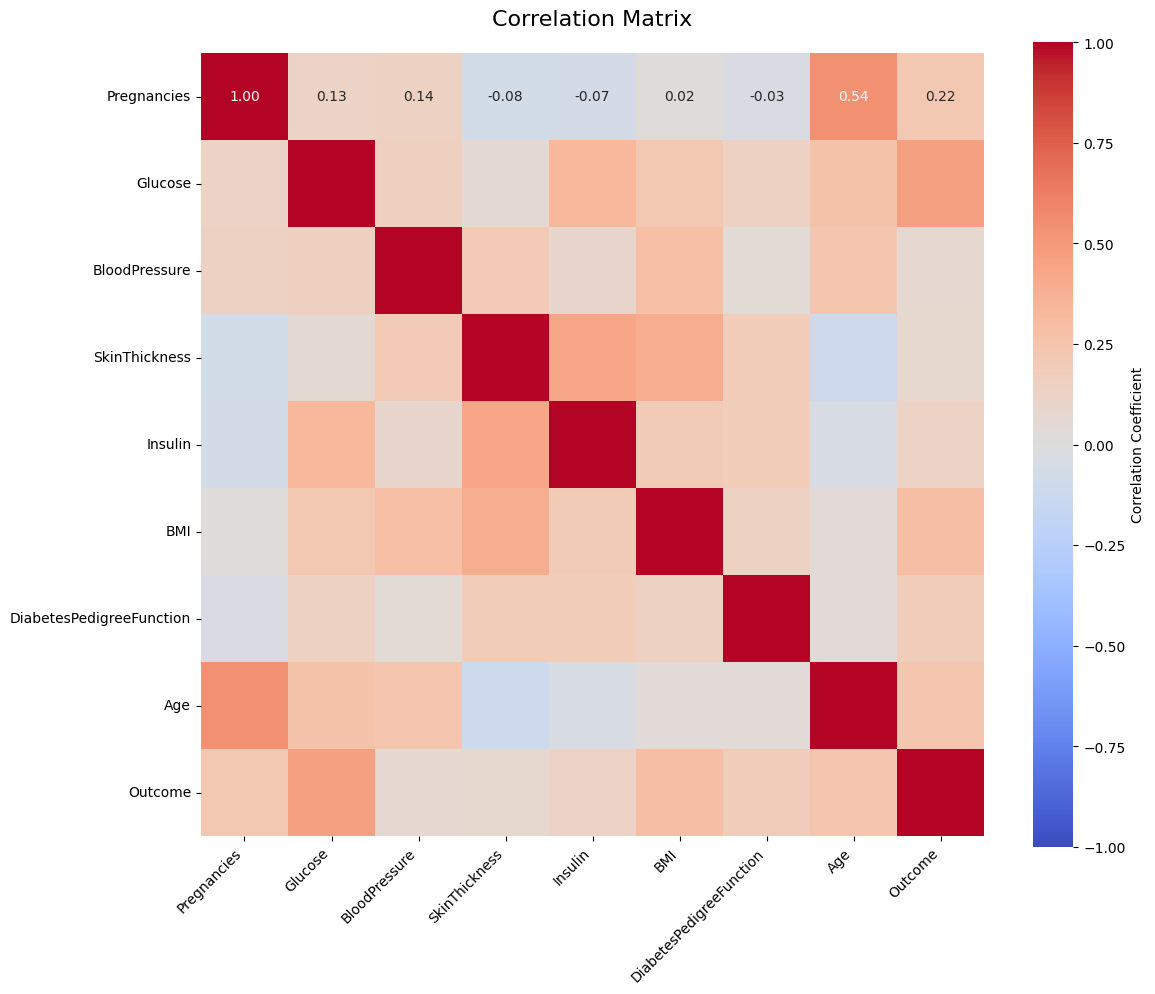

In [143]:
correlation_matrix = data.corr()

# Create a figure with specified size
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,           # Show the numerical value in each cell
    fmt='.2f',            # Format to 2 decimal places
    cmap='coolwarm',      # Use a diverging colormap (red for positive, blue for negative)
    vmin=-1, vmax=1,      # Fix the range of correlations from -1 to 1
    center=0,             # Center the colormap at 0
    square=True,          # Make the cells square
    cbar_kws={'label': 'Correlation Coefficient'}  # Label the colorbar
)

# Add title
plt.title('Correlation Matrix', pad=20, fontsize=16)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Correlation matrix 

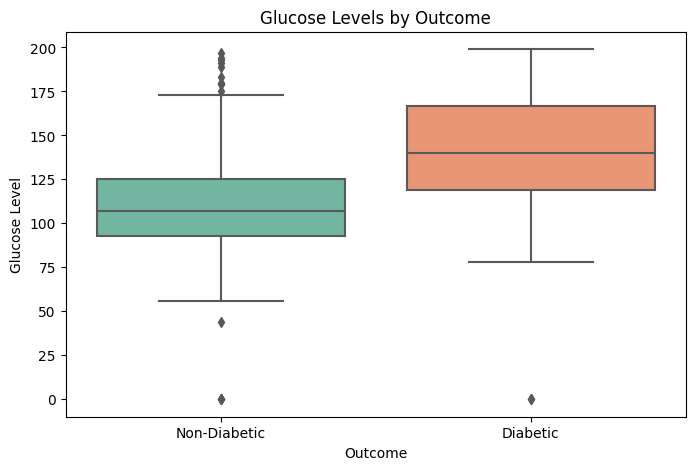

In [144]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outcome', y='Glucose', data=data, palette='Set2')
plt.title("Glucose Levels by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Glucose Level")
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()


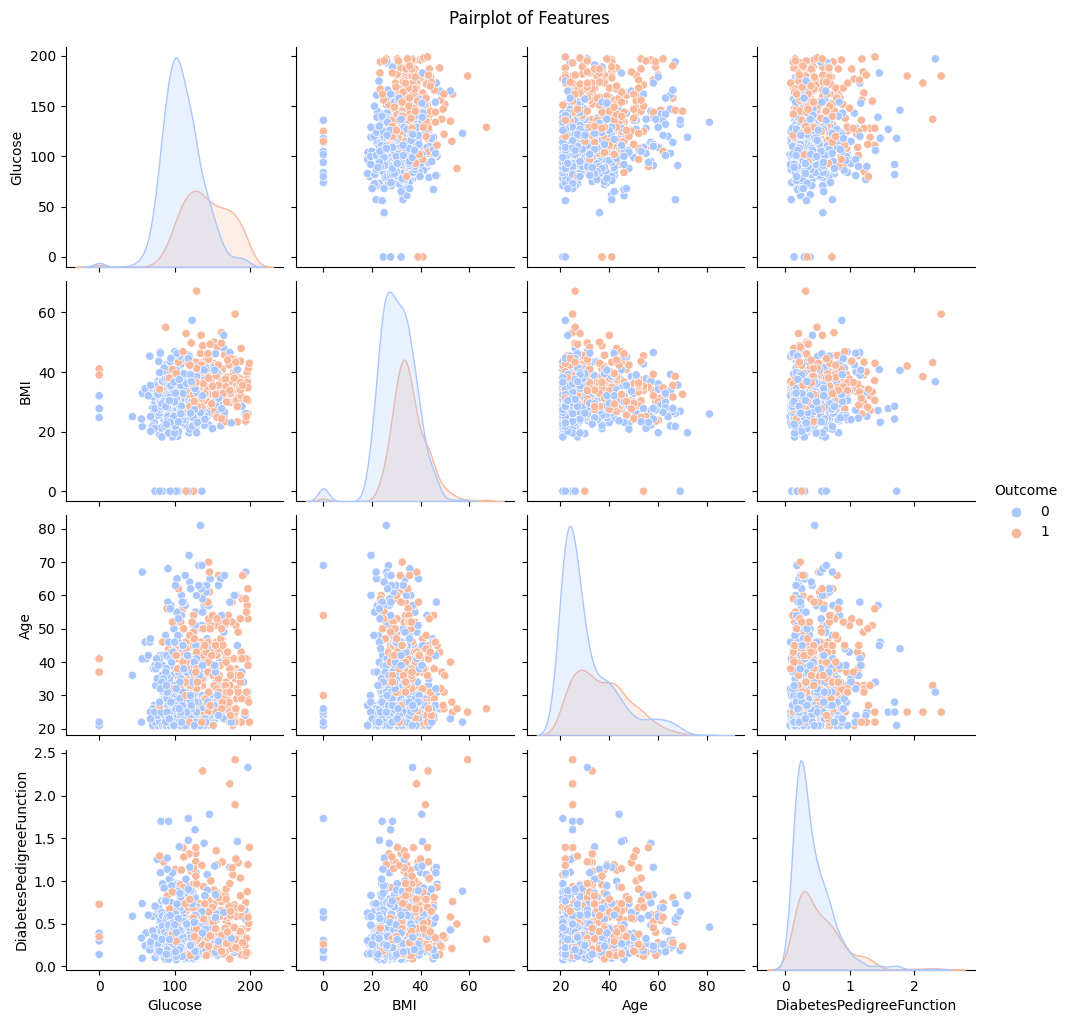

In [145]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Outcome']
sns.pairplot(data[features], hue='Outcome', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

# Pair Plot

In [148]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Splitting

In [150]:
X, Y = data.drop(columns='Outcome', axis = 1), data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [151]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

#  Data Standardization

In [182]:
scalar = StandardScaler()

In [184]:
scalar.fit(X)

StandardScaler()

In [186]:
standardized_data = scalar.transform(X)
standardized_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [188]:
X= standardized_data
Y = data['Outcome']

# Train test split

In [191]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, 
    test_size=0.2,        # 20% of the data will be used for testing
    stratify=Y,           # Ensures stratified sampling
    random_state=42       # Sets a seed for reproducibility
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 8) (154, 8) (614,) (154,)


# SVM Classifier

In [194]:

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svm_clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [196]:

# Evaluate on the test set
y_pred = svm_clf.predict(x_test)
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Test Set Evaluation:
Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [198]:

# Perform k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate using cross-validation
cv_scores = cross_val_score(svm_clf, X, Y, cv=kf, scoring='accuracy')
print(f"\n{k}-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.2f}")


5-Fold Cross-Validation Scores: [0.75974026 0.77272727 0.74675325 0.79084967 0.73202614]
Mean CV Accuracy: 0.76
Standard Deviation of CV Accuracy: 0.02


# Prediction on new data

In [217]:
# First, let's reinitialize the SVM classifier with probability estimation enabled
svm_clf = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=42,
    probability=True  # Enable probability estimation
)

# Retrain the model
svm_clf.fit(x_train, y_train)

# Now let's make predictions on the new data
# Separate features and target
x_new_data = new_data.drop(columns='Outcome', axis=1)
y_new_data = new_data['Outcome']

# Scale the new data
x_new_data_scaled = scalar.transform(x_new_data)

# Make predictions
predictions = svm_clf.predict(x_new_data_scaled)
prediction_probs = svm_clf.predict_proba(x_new_data_scaled)

# Create results DataFrame
results_df = pd.DataFrame({
    'Patient_Features': [dict(zip(x_new_data.columns, row)) for row in x_new_data.values],
    'Predicted_Class': predictions,
    'Probability_Non_Diabetic': prediction_probs[:, 0],
    'Probability_Diabetic': prediction_probs[:, 1]
})

# Display results
print("\nPrediction Results:")
for idx, row in results_df.iterrows():
    print(f"\nPatient {idx + 1}:")
    print(f"Prediction: {'Diabetic' if row['Predicted_Class'] == 1 else 'Non-Diabetic'}")
    print(f"Probability of Non-Diabetic: {row['Probability_Non_Diabetic']:.2f}")
    print(f"Probability of Diabetic: {row['Probability_Diabetic']:.2f}")
    print("Features:", row['Patient_Features'])
    print("-" * 80)

# Calculate accuracy
accuracy = accuracy_score(y_new_data, predictions)
print(f"\nOverall Accuracy on New Data: {accuracy:.2f}")

NameError: name 'X_train_scaled' is not defined